In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:

y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

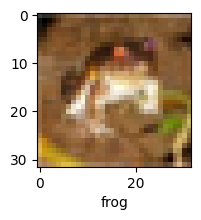

In [10]:

plot_sample(X_train, y_train, 0)

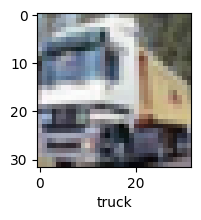

In [11]:

plot_sample(X_train, y_train, 1)

# Normalizing the training data

In [13]:

X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.1235 - loss: 2.3008
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.1344 - loss: 2.2996
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.1488 - loss: 2.2988
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.1326 - loss: 2.2977
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.1458 - loss: 2.2966


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.20      0.03      0.05      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.33      0.14      0.20      1000
           6       0.12      0.96      0.21      1000
           7       0.22      0.01      0.01      1000
           8       0.31      0.30      0.30      1000
           9       0.48      0.13      0.21      1000

    accuracy                           0.16     10000
   macro avg       0.17      0.16      0.10     10000
weighted avg       0.17      0.16      0.10     10000



C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mehta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# Now let us build a convolutional neural network to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\mehta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.2374 - loss: 2.0778
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3057 - loss: 1.9164
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3302 - loss: 1.8527
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3529 - loss: 1.7938
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3823 - loss: 1.7230
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4049 - loss: 1.6679
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4215 - loss: 1.6226
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4360 - loss: 1.5869
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4445 - loss: 1.5612
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4508 - loss: 1.5438


# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4522 - loss: 1.5447


[1.5446778535842896, 0.4521999955177307]

In [20]:

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.45297330e-02, 5.10331057e-02, 1.27015829e-01, 3.00323218e-01,
        6.05386309e-02, 2.16507569e-01, 1.58968762e-01, 8.86565819e-03,
        3.04881353e-02, 3.17293443e-02],
       [5.10705970e-02, 4.26001698e-01, 4.81097633e-03, 1.55609741e-03,
        1.30819099e-03, 1.34536671e-03, 5.86100359e-05, 4.04549111e-03,
        9.59276259e-02, 4.13875371e-01],
       [1.30180493e-02, 4.20665443e-01, 4.29822085e-03, 4.91518900e-03,
        8.56189290e-04, 4.36180690e-03, 3.00154468e-04, 2.44913786e-03,
        1.28916278e-01, 4.20219570e-01],
       [1.20745435e-01, 1.70688853e-01, 1.20000556e-01, 4.80372608e-02,
        3.43374610e-02, 3.26767638e-02, 8.60663969e-03, 1.19146043e-02,
        4.03834850e-01, 4.91575450e-02],
       [1.95332477e-03, 1.08779245e-03, 6.07396439e-02, 1.25170827e-01,
        2.12213010e-01, 8.54790583e-02, 4.88013029e-01, 2.12589633e-02,
        1.81077851e-03, 2.27361964e-03]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 8, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

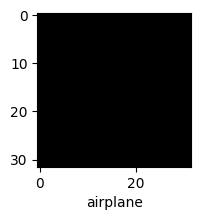

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'ship'

In [25]:
classes[y_classes[3]]

'ship'